<a href="https://colab.research.google.com/github/sau-rav/learning_RAG/blob/main/agentchat_gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install "pyautogen[gemini]~=0.2.0b4"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.4/314.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00


In [4]:
!pip install "google-generativeai" "pydash" "pillow"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 2.5 MB/s eta 0:00:00


In [5]:
import requests
import json
import pdb
import os
import re

from typing import Any, Callable, Dict, List, Optional, Tuple, Type, Union

import autogen
from autogen import AssistantAgent, Agent, UserProxyAgent, ConversableAgent

from autogen.agentchat.contrib.img_utils import get_image_data, _to_pil
from autogen.agentchat.contrib.multimodal_conversable_agent import MultimodalConversableAgent

from termcolor import colored
import random

from autogen.code_utils import DEFAULT_MODEL, UNKNOWN, content_str, execute_code, extract_code, infer_lang

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [6]:
import os
import PIL
import matplotlib.pyplot as plt

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


OAI_CONFIG_LIST example



```
[
    {
        "model": "gpt-35-turbo",
        "api_key": "open ai api key",
        "base_url": "https://tnrllmproxy.azurewebsites.net/v1",
        "api_version": "2023-06-01-preview"
    },
    {
        "model": "gpt-4-vision-preview",
        "api_key": "open ai api key",
        "api_version": "2023-06-01-preview"
    },
    {
        "model": "dalle",
        "api_key": "open ai api key",
        "api_version": "2023-06-01-preview"
    },
    {
        "model": "gemini-pro",
        "api_key": "google api key",
        "api_type": "google"
    },
    {
        "model": "gemini-pro-vision",
        "api_key": "google api key",
        "api_type": "google"
    }
]
```



In [15]:
config_list_4v = autogen.config_list_from_json(
    "/content/drive/My Drive/llmEnv/OAI_CONFIG_LIST.json",
    filter_dict={
        "model": ["gpt-4-vision-preview"],
    },
)

config_list_gpt4 = autogen.config_list_from_json(
    "/content/drive/My Drive/llmEnv/OAI_CONFIG_LIST.json",
    filter_dict={
        "model": ["gpt-4", "gpt-4-0314", "gpt4", "gpt-4-32k", "gpt-4-32k-0314", "gpt-4-32k-v0314"],
    },
)

config_list_gemini = autogen.config_list_from_json(
    "/content/drive/My Drive/llmEnv/OAI_CONFIG_LIST.json",
    filter_dict={
        "model": ["gemini-pro"],
    },
)

config_list_gemini_vision = autogen.config_list_from_json(
    "/content/drive/My Drive/llmEnv/OAI_CONFIG_LIST.json",
    filter_dict={
        "model": ["gemini-pro-vision"],
    },
)

In [18]:
assistant = AssistantAgent("assistant",
                           llm_config={"config_list": config_list_gemini, "seed": 42},
                           max_consecutive_auto_reply=3)
# print(assistant.system_message)

user_proxy = UserProxyAgent("user_proxy",
                            code_execution_config={"work_dir": "coding", "use_docker": False},
                            human_input_mode="NEVER",
                           is_termination_msg = lambda x: content_str(x.get("content")).find("TERMINATE") >= 0)

user_proxy.initiate_chat(assistant, message="Sort the array with Merge Sort: [4, 1, 3, 2]")

user_proxy (to assistant):

Sort the array with Merge Sort: [4, 1, 3, 2]

--------------------------------------------------------------------------------
assistant (to user_proxy):

```python
# filename: mergesort.py
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    
    mid = len(arr) // 2
    left_half = merge_sort(arr[:mid])
    right_half = merge_sort(arr[mid:])

    return merge(left_half, right_half)

def merge(left, right):
    merged = []
    left_index = 0
    right_index = 0

    while left_index < len(left) and right_index < len(right):
        if left[left_index] <= right[right_index]:
            merged.append(left[left_index])
            left_index += 1
        else:
            merged.append(right[right_index])
            right_index += 1

    merged.extend(left[left_index:])
    merged.extend(right[right_index:])

    return merged

nums = [4, 1, 3, 2]
print(merge_sort(nums))
```

-----------------------------------------------------------------------

ChatResult(chat_id=None, chat_history=[{'content': 'Sort the array with Merge Sort: [4, 1, 3, 2]', 'role': 'assistant'}, {'content': '```python\n# filename: mergesort.py\ndef merge_sort(arr):\n    if len(arr) <= 1:\n        return arr\n    \n    mid = len(arr) // 2\n    left_half = merge_sort(arr[:mid])\n    right_half = merge_sort(arr[mid:])\n\n    return merge(left_half, right_half)\n\ndef merge(left, right):\n    merged = []\n    left_index = 0\n    right_index = 0\n\n    while left_index < len(left) and right_index < len(right):\n        if left[left_index] <= right[right_index]:\n            merged.append(left[left_index])\n            left_index += 1\n        else:\n            merged.append(right[right_index])\n            right_index += 1\n\n    merged.extend(left[left_index:])\n    merged.extend(right[right_index:])\n\n    return merged\n\nnums = [4, 1, 3, 2]\nprint(merge_sort(nums))\n```', 'role': 'user'}, {'content': 'exitcode: 0 (execution succeeded)\nCode output: \n[1, 2, 

In [19]:
from autogen.coding import LocalCommandLineCodeExecutor

In [20]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
)

In [21]:
from autogen import ConversableAgent, AssistantAgent


In [23]:
# code executor agent
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

In [24]:
# code writer agent
code_writer_agent = AssistantAgent(
    name="code_writer_agent",
    llm_config={"config_list": config_list_gemini, "seed": 42},
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [29]:
code_writer_agent_system_message = code_writer_agent.system_message

In [30]:
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

In [31]:
import datetime

today = datetime.datetime.now().date()
message = f"Today is {today}. "\
"Create a plot showing stock gain YTD for NVDA and TLSA. "\
"Make sure the code is in markdown code block and save the figure"\
" to a file ytd_stock_gains.png."""

In [32]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=message,
)

# this is not working as intended it tries to read data from stock_quotes.csv whereas in deeplearning.ai turorial with gpt-4 it fetches data form yfinance

code_executor_agent (to code_writer_agent):

Today is 2024-07-29. Create a plot showing stock gain YTD for NVDA and TLSA. Make sure the code is in markdown code block and save the figure to a file ytd_stock_gains.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

```python
# filename: plot_ytd_stock_gains.py
import pandas as pd
import matplotlib.pyplot as plt

stocks = ['NVDA', 'TLSA']
start_date = '2023-01-01'
end_date = '2024-07-29'

quotes = pd.read_csv('stock_quotes.csv')
quotes = quotes[(quotes['Date'] >= start_date) & (quotes['Date'] <= end_date)]
quotes = quotes[quotes['Symbol'].isin(stocks)]

quotes['YTD Return'] = (quotes['Close'] - quotes['Open']) / quotes['Open'] * 100
quotes = quotes.pivot(index='Date', columns='Symbol', values='YTD Return')

ax = quotes.plot(figsize=(12, 6))
ax.set_ylabel('YTD Return (%)')
plt.title('Stock YTD Return for NVDA and TSLA')
plt.savefig('ytd_stock_gains.png')
plt.s

In [33]:
def get_stock_prices(stock_symbols, start_date, end_date):
    """Get the stock prices for the given stock symbols between
    the start and end dates.

    Args:
        stock_symbols (str or list): The stock symbols to get the
        prices for.
        start_date (str): The start date in the format
        'YYYY-MM-DD'.
        end_date (str): The end date in the format 'YYYY-MM-DD'.

    Returns:
        pandas.DataFrame: The stock prices for the given stock
        symbols indexed by date, with one column per stock
        symbol.
    """
    import yfinance

    stock_data = yfinance.download(
        stock_symbols, start=start_date, end=end_date
    )
    return stock_data.get("Close")

In [34]:
def plot_stock_prices(stock_prices, filename):
    """Plot the stock prices for the given stock symbols.

    Args:
        stock_prices (pandas.DataFrame): The stock prices for the
        given stock symbols.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    for column in stock_prices.columns:
        plt.plot(
            stock_prices.index, stock_prices[column], label=column
                )
    plt.title("Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.savefig(filename)

In [35]:
executor1 = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
    functions=[get_stock_prices, plot_stock_prices],
)

In [37]:
code_writer_agent_system_message += executor1.format_functions_for_prompt()
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

In [38]:
code_writer_agent1 = ConversableAgent(
    name="code_writer_agent1",
    system_message=code_writer_agent_system_message,
    llm_config={"config_list": config_list_gemini, "seed": 42},
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [39]:
code_executor_agent1 = ConversableAgent(
    name="code_executor_agent1",
    llm_config=False,
    code_execution_config={"executor": executor1},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

In [40]:
chat_result = code_executor_agent1.initiate_chat(
    code_writer_agent1,
    message=f"Today is {today}."
    "Download the stock prices YTD for NVDA and TSLA and create"
    "a plot. Make sure the code is in markdown code block and "
    "save the figure to a file stock_prices_YTD_plot.png.",
)

code_executor_agent1 (to code_writer_agent1):

Today is 2024-07-29.Download the stock prices YTD for NVDA and TSLA and createa plot. Make sure the code is in markdown code block and save the figure to a file stock_prices_YTD_plot.png.

--------------------------------------------------------------------------------
code_writer_agent1 (to code_executor_agent1):

```python
# filename: stock_prices_YTD.py
from functions import get_stock_prices, plot_stock_prices
import pandas as pd

today = '2024-07-29'
start_date = today[:4] + '-01-01'
stock_symbols = ['NVDA', 'TSLA']
stock_prices = get_stock_prices(stock_symbols, start_date, today)
plot_stock_prices(stock_prices, 'stock_prices_YTD_plot.png')
```

--------------------------------------------------------------------------------
Provide feedback to code_writer_agent1. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: 

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLO

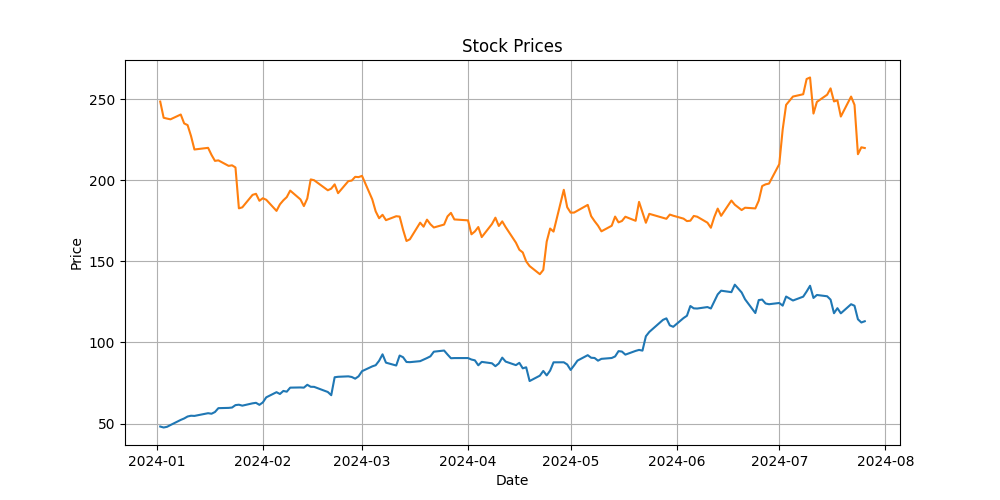

In [42]:
from IPython.display import Image

Image(os.path.join("coding", "stock_prices_YTD_plot.png"))

In [1]:
!pip install nsepy

  Preparing metadata (setup.py) ... done
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36056 sha256=b14c1ba2768454861130f26edb874702d1ef3ce3ad1c54c728385c0755895eb7
  Stored in directory: /root/.cache/pip/wheels/4c/87/cb/acaf83f625e5fc73e1fe6e2a8e97680c74cd72391850ef5a86
Successfully built nsepy


In [6]:
from nsepy import get_history
from datetime import date

sbin = get_history(symbol='SBIN',
                    start=date(2015,1,1),
                    end=date(2015,1,10))


In [9]:
sbin.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,


In [10]:
nifty = get_history(symbol="NIFTY",
                    start=date(2015,1,1),
                    end=date(2015,1,10),
					index=True)

In [13]:
nifty[['Close', 'Turnover']].plot(secondary_y='Turnover')

TypeError: no numeric data to plot